<a href="https://colab.research.google.com/github/alimoorreza/CS167-Project-1/blob/main/Project1_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code:
Your first step is to decide which dataset you would like to work with for this project.

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify).

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

# Self-Evaluation:

| **Description/Writing** | **I think I deserve** |
|-------------------------|-----------------------|
| 1: Problem              | /2                    |
| 2: Data Prep            | /2                    |
| 3: Research             | /10                   |
| 4: Analysis             | /10                   |
| 5: Bumps in the Road.   | /1                    |
| Total                   | /25                   |

# 1. Problem:
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict...

Dataset: https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university?resource=download

The dataset I am using is about college admission. I found it from the examples given in the project description.

Description: This dataset is students that are applying to get into a grad school.

**Target Variable:**
* Chance of Admit (range 0-1): The chance a student is admitted to the unversity  

**Explanatory Variables:**
* GRE Scores (out of 340): Test Score
* TOEFL Scores (Out of 120): Test Score  
* University Rating (Out of 5): Rating of university student attended
* Undergraduate GPA (Our of 10): GPA of student during undergrad
* Research Experience (0 if No, 1 if Yes): If the student has research experience
* LOR (0-5): Strength of Letter of Reccomendation
* SOP (0-5): Strength of Statement of Purpose

**The Goal:** To find the best model to predict how the explanatory variables predict the chance of admit.

**Experiment Type**: This would be a **Regression** type exeperiment because the Target variable can take on any number that ranges from 0-1.

**Evaluation Methods**: I will be using R2 as the evaluation method

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

1. I checked to see if there were any NA values in any of the columns. There were not.
2. I then checked to see if each column was of the desired type. They were.
3. I then wanted to check the feature scores of each explanatory variable, so that I could try to reduce my dimensionality.

My dataset should be clean and ready to use now in algorithms now. I know that it is ready to use and clean because I checked for NA values and also checked to see if the columns were in the correct format. This makes it so that all of the data is ready to use for machine learning purposes.

I also wanted to see the scores for all of the variables, so that I could see if there were any that I could get rid of.

In [ ]:
import pandas as pd

# load and preapre your data here:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab Notebooks/Data/adm_data.csv'
data = pd.read_csv(path)

SystemError: <built-in function isinstance> returned a result with an exception set

In [ ]:
#Check to see if there are any NA's
data.isna().any()

,0
Serial No.,False
GRE Score,False
TOEFL Score,False
University Rating,False
SOP,False
LOR,False
CGPA,False
Research,False
Chance of Admit,False


There are no columns with NA values, so I do not need to do anything further with this step. I will now check to see if all of the columns are in a numeric format. Int for the whole numbers and floats for the decimals.



In [ ]:
# Check the type that each column is in.
type = data.dtypes
print(type)

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


All of the columns are of the desired type, so nothing needs to be done. I will now split the data into train and testing data and then check the scores for each variable.

In [ ]:
import pandas
from sklearn.model_selection import train_test_split

# Split the data into training and testing subsets
predictors = ["GRE Score", "TOEFL Score", "University Rating", "SOP", "LOR ", "CGPA", "Research"]
target = "Chance of Admit "

train_data, test_data, train_sln, test_sln = \
  train_test_split(data[predictors], data[target], test_size = 0.2, random_state = 41)

In [ ]:
# I will now check the score for each feature
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=5) # made this a 5 after evaluating the scores
selector.fit(train_data, train_sln)

print('Here are the scores of each feature:')
print(selector.scores_)
print(predictors)

# Now I will transform the columns, so that there are only the ones, i decided to keep
train_transformed = selector.transform(train_data)
test_transformed = selector.transform(test_data)

Here are the scores of each feature:
[12.42449456 12.71217381  8.76478566  6.66093667  5.44164898 24.52092991
  3.96638246]
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']


I will be keeping 5/7 of the variables in my final model.  

GRE Score, TOEFL Score, University Rating, SOP, and CGPA.

I decided to remove LOR and Research due to the low scores of 5.44 and 3.9 respectivley

# 3. Research

Put your code and your experiments here.

For full credit, your experiments should include the following models:
- __k Nearest Neighbors__
- __weighted k Nearest Neighbors__
- __decision tree__
- __random forest__

You need to demonstrate the performance of these models on both __normalized__ and __non-normalized__ data.

For each of the above models, you need to include a __graph of at least 1 tuned parameter__.


## Non-Normalized Models

### kNN

R2 = 0.5305967377563641 k = 1
R2 = 0.6563221824313761 k = 3
R2 = 0.7105237512735152 k = 5
R2 = 0.7445746533529078 k = 9
R2 = 0.7859084371359526 k = 15
R2 = 0.7699707548599146 k = 21
R2 = 0.7600451597706439 k = 31
R2 = 0.7488135803443073 k = 51
R2 = 0.6958940940014435 k = 101
R2 = 0.6580018144410008 k = 129


(0.0, 130.0, 0.0, 1.0)

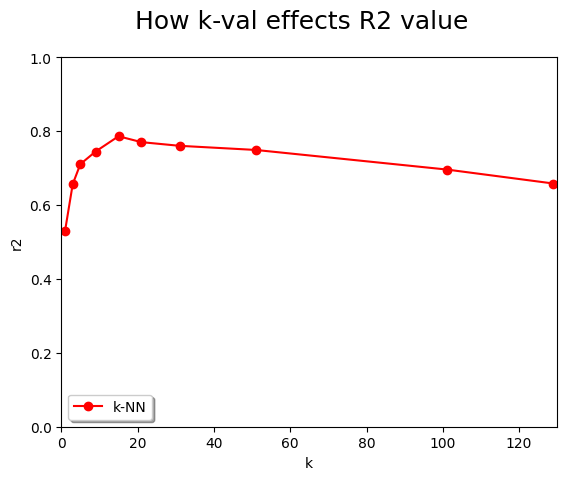

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas
# Explore to learn what the best K-value is for kNN
k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_r2 = []

for k in k_vals:
  predictions = KNeighborsRegressor(n_neighbors = k).fit(train_transformed, train_sln).predict(test_transformed)
  kNN_r2.append(metrics.r2_score(test_sln, predictions))
  print("R2 =", metrics.r2_score(test_sln, predictions), "k =", k)

plt.suptitle('How k-val effects R2 value',fontsize=18)
plt.xlabel('k')
plt.ylabel('r2')
plt.plot(k_vals,kNN_r2,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

The best K-value is k=15 because it is a local maximum for R2 value.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import pandas

# kNN Model, Non-Normalized
knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(train_transformed, train_sln)
predictions = knn.predict(test_transformed)

#Print the goodness of fit statistics
print("R2: ", metrics.r2_score(test_sln, predictions))
print("-------------------------------------------------------")

R2:  0.7859084371359526
-------------------------------------------------------


### Weighted kNN

R2 = 0.5305967377563641 k = 1
R2 = 0.6583485439398336 k = 3
R2 = 0.7140741109010785 k = 5
R2 = 0.7513375856176884 k = 9
R2 = 0.7869172106930467 k = 15
R2 = 0.7780077609317693 k = 21
R2 = 0.7728590489474064 k = 31
R2 = 0.7691037596305466 k = 51
R2 = 0.7460131233250649 k = 101
R2 = 0.730057339840114 k = 129


(0.0, 130.0, 0.0, 1.0)

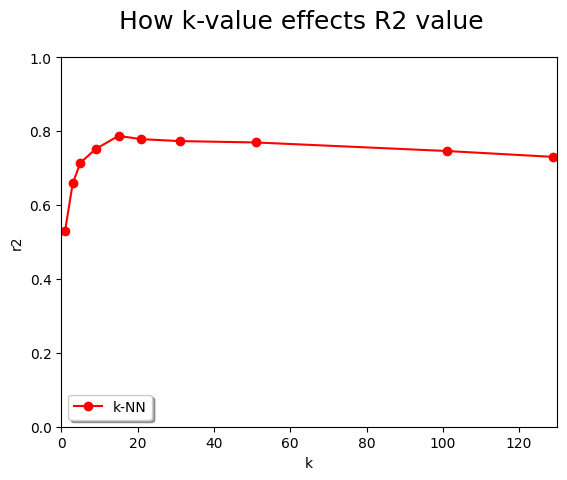

In [ ]:
# Explore to learn what the best K-value is for Weighted kNN
k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_r2 = []

for k in k_vals:
  predictions = KNeighborsRegressor(n_neighbors = k, weights = 'distance').fit(train_transformed, train_sln).predict(test_transformed)
  kNN_r2.append(metrics.r2_score(test_sln, predictions))
  print("R2 =", metrics.r2_score(test_sln, predictions), "k =", k)

plt.suptitle('How k-value effects R2 value',fontsize=18)
plt.xlabel('k')
plt.ylabel('r2')
plt.plot(k_vals,kNN_r2,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

The best k-value is still k=15 for the weighted kNN.

In [ ]:
# Weighted kNN model, non-normalized
knn = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')
knn.fit(train_transformed, train_sln)
predictions = knn.predict(test_transformed)

#Print the goodness of fit statistics
print("R2: ", metrics.r2_score(test_sln, predictions))
print("-------------------------------------------------------")

R2:  0.7869172106930467
-------------------------------------------------------


### Decision Tree

R2 = 0.5435923630481795 md = 1
R2 = 0.6471697860660459 md = 2
R2 = 0.6654817298549687 md = 3
R2 = 0.6843191093504264 md = 4
R2 = 0.6799316746989468 md = 5
R2 = 0.6931388203805299 md = 6
R2 = 0.6842860682925206 md = 7
R2 = 0.5592573247307264 md = 8
R2 = 0.6437934861775061 md = 9
R2 = 0.5986928940803253 md = 10
R2 = 0.5893757003276643 md = 11
R2 = 0.5661033715832782 md = 12
R2 = 0.6112686465168244 md = 13
R2 = 0.5064127245901751 md = 14
R2 = 0.5672679211194744 md = 15
R2 = 0.6190528112744014 md = 16
R2 = 0.6190528112744014 md = 17
R2 = 0.6190528112744014 md = 18
R2 = 0.6190528112744014 md = 19
R2 = 0.6190528112744014 md = 20


(0.0, 25.0, 0.0, 1.0)

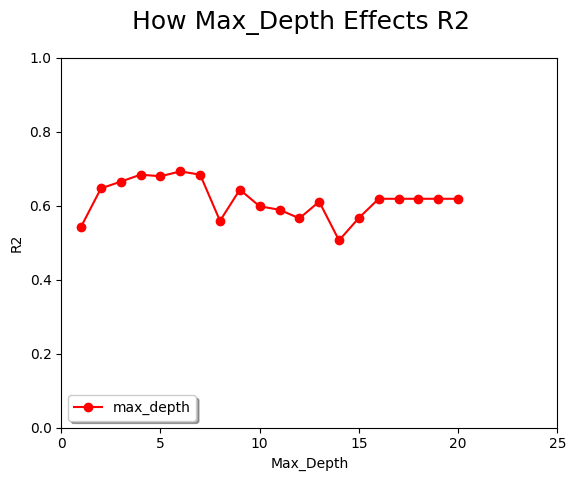

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#Explore to find out what the best max_depth is for DecisionTree
md_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
md_r2 = []

for md in md_vals:
  predictions = DecisionTreeRegressor(max_depth = md, random_state=41).fit(train_transformed, train_sln).predict(test_transformed)
  md_r2.append(metrics.r2_score(test_sln, predictions))
  print("R2 =", metrics.r2_score(test_sln, predictions), "md =", md)

plt.suptitle('How Max_Depth Effects R2',fontsize=18)
plt.xlabel('Max_Depth')
plt.ylabel('R2')
plt.plot(md_vals,md_r2,'ro-',label='max_depth')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,25,0,1])

The best max_depth value is 6. This is because it is the first local maximum for R2.

In [ ]:
# Decision Tree Model
my_tree = DecisionTreeRegressor(max_depth = 6, random_state=41)
my_tree.fit(train_transformed, train_sln)
predictions = my_tree.predict(test_transformed)

#Print the goodness of fit statistics
print("R2: ", metrics.r2_score(test_sln, predictions))
print("-------------------------------------------------------")

R2:  0.6931388203805299
-------------------------------------------------------


### Random Forest

R2 = 0.38598673158897234 Trees = 1
R2 = 0.5064212430872397 Trees = 2
R2 = 0.5728787711859754 Trees = 3
R2 = 0.6054402529652889 Trees = 4
R2 = 0.6113793491186763 Trees = 5
R2 = 0.5989396932053818 Trees = 6
R2 = 0.6073438762888921 Trees = 7
R2 = 0.6260358492430464 Trees = 8
R2 = 0.632512457302874 Trees = 9
R2 = 0.6366861001979699 Trees = 10
R2 = 0.644610555293649 Trees = 11
R2 = 0.6594475243543831 Trees = 12
R2 = 0.6532509982115994 Trees = 13
R2 = 0.6741007300803985 Trees = 14
R2 = 0.6841223165314496 Trees = 15
R2 = 0.6983259449568794 Trees = 16
R2 = 0.7016441501075437 Trees = 17
R2 = 0.7041292499570606 Trees = 18
R2 = 0.7059037262209222 Trees = 19
R2 = 0.7071606486324405 Trees = 20
R2 = 0.7159879765644209 Trees = 21
R2 = 0.721862763548571 Trees = 22
R2 = 0.7257282269904237 Trees = 23
R2 = 0.7234100793128868 Trees = 24
R2 = 0.7203617022001575 Trees = 25
R2 = 0.7211116644717843 Trees = 26
R2 = 0.7216193486707133 Trees = 27
R2 = 0.7225289074328651 Trees = 28
R2 = 0.7236359697320722 Trees =

(0.0, 35.0, 0.0, 1.0)

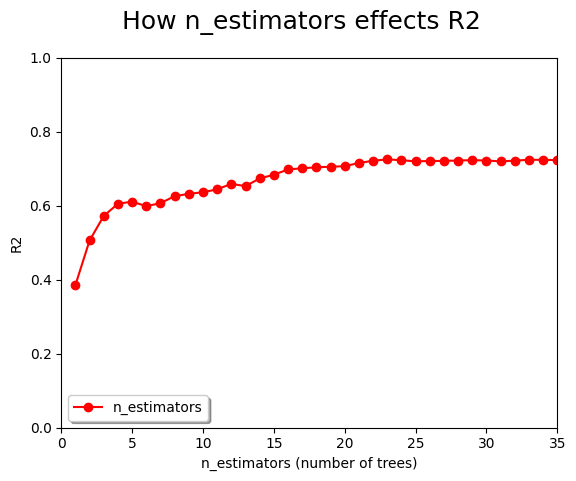

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Explore the best value for n_estimators (number of trees)
n_vals = []
n_r2 = []

for i in range(1,36):
  n_vals.append(i)

for n in n_vals:
  predictions = RandomForestRegressor(n_estimators=n, random_state=41).fit(train_transformed, train_sln).predict(test_transformed)
  n_r2.append(metrics.r2_score(test_sln, predictions))
  print("R2 =", metrics.r2_score(test_sln, predictions), "Trees =", n)

plt.suptitle('How n_estimators effects R2',fontsize=18)
plt.xlabel('n_estimators (number of trees)')
plt.ylabel('R2')
plt.plot(n_vals,n_r2,'ro-',label='n_estimators')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,35,0,1])

Once the number of trees gets to 22, the R2 value stops changing by a significant amount. I will use n_estimators=22

In [ ]:
# Random Forest Model
forest = RandomForestRegressor(random_state=41,n_estimators=22)
forest.fit(train_transformed, train_sln)
predictions = forest.predict(test_transformed)


#Print the goodness of fit statistics
print("R2: ", metrics.r2_score(test_sln, predictions))
print("-------------------------------------------------------")

R2:  0.721862763548571
-------------------------------------------------------


## Normalized Models

In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_transformed)
train_normalized = scaler.transform(train_transformed)
test_normalized = scaler.transform(test_transformed)

KeyboardInterrupt: 

### kNN

In [ ]:
# kNN Model, Normalized
knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(train_normalized, train_sln)
predictions = knn.predict(test_normalized)

#Print the goodness of fit statistics
print("R2: ", metrics.r2_score(test_sln, predictions))
print("-------------------------------------------------------")

R2:  0.7502767375746363
-------------------------------------------------------


## Weighted kNN

In [ ]:
# Weighted kNN model, Normalized
knn = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')
knn.fit(train_normalized, train_sln)
predictions = knn.predict(test_normalized)

#Print the goodness of fit statistics
print("R2: ", metrics.r2_score(test_sln, predictions))
print("-------------------------------------------------------")

R2:  0.7575596969505539
-------------------------------------------------------


## Decision Tree

In [ ]:
# Decision Tree Model
my_tree = DecisionTreeRegressor(max_depth = 6, random_state=41)
my_tree.fit(train_normalized, train_sln)
predictions = my_tree.predict(test_normalized)

#Print the goodness of fit statistics
print("R2: ", metrics.r2_score(test_sln, predictions))
print("-------------------------------------------------------")

R2:  0.6931388203805299
-------------------------------------------------------


## Random Forest

In [ ]:
# Random Forest Model
forest = RandomForestRegressor(random_state=41,n_estimators=22)
forest.fit(train_normalized, train_sln)
predictions = forest.predict(test_normalized)


#Print the goodness of fit statistics
print("R2: ", metrics.r2_score(test_sln, predictions))
print("-------------------------------------------------------")

R2:  0.721891487075863
-------------------------------------------------------


#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

This chart might help organize your results:

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |  0.7859            |    0.7503      |    k                |
| w-kNN         |  0.7869            |    0.7576      |    k                |
| decision tree |  0.6931            |    0.6931      |    max_depth        |
| random forest |  0.7219            |    0.7219      |    n-estimators     |

**Parameter Tuning Results**:
- For both kNN and weighed kNN, I decided to evaluate the k-value. k-value is the number of points it will look for while deciding which cluster it will go to. I thought that this was a good value to tinker with because it is the main parameter we talked about in class for kNN type experiments. The best k-value ended up being the same for weighted and normal kNN, that being k=15. I decided on this value because it was the first maximum before the R2 value began to go back down.
- For the decision tree, I decided to evaluate the max_dpeth. Max depth is how complex the tree can get and the number of levels a tree is allowed to have. I thought this would be a good parameter to evaluate because it can help to control overfitting. The best value for this parameter was max_depth = 6 because it is the first maximum R2 value before the R2 value goes down.
- For the random forest, I decided to evaluate that n_estimators. n_estimators is the number of trees the model will use. The best value for this n_esimators = 22. I decided to differ from my other method of deciding the value. This is because I noticed that the R2 value appeared to plateau and begin creating a straight line of sorts after n_estimators = 22.

**Reccomendation (Best Model)**: The best model to use would be a weighted kNN with a k value of 15 and non-normalized data. This model had the best R2 value of 0.7869. A higher R2 indicates that the data fits the model well. The higher the R2 value, the better the fit.

**Worst Model**: The worst model was the decision tree model with an R2 value of 0.6931.

**Interesting Finds**:
- The first interesting thing I found was the normalizing the data made the R2 value worse for the kNN and weighted kNN models. I didn't expect this because normalizing the data usually makes the model better. My hypothesis is that it is possible that the data doesn't follow a linear pattern. This would make it so that attempting to linearize the data actually makes it worse. I actually have no clue as to why it did that though.
- Another thing that I noticed is that normalizing the data had little to no effect on the decision tree and random forest models.
- While deciding which variables to keep, I discovered that CGPA (College GPA) had the highest score of 24.52092991. This indicates that CGPA is the most important variable when predicting chance of admit.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

One of the biggest challenges for me was the one paramenter graph. I had a hard time remembering what that meant. I then went through the slides and realized what that meant. After this, I had a hard time deciding what parameter I wanted to change for each model. The way that I decided was by looking up each type of regressor, i.e., KNeighborsRegressor, and looking at all of the parameters that I could tune.

## Sources
https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html  

https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsRegressor.html  

https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html  